In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers

**PREPROCESSING :**


In [148]:
df = pd.read_csv('bank.csv')

In [149]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [150]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [151]:
df.shape

(11162, 17)

In [152]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [153]:
df.deposit.unique()

array(['yes', 'no'], dtype=object)

In [154]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [155]:
#we notice that we dont have any missing value !

In [156]:
#lets undertand our categorical features more , so we transform it to numerical one later :

In [157]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [158]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [159]:
df['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [160]:
df['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [161]:
df['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [162]:
df['contact'].value_counts()

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [163]:
df['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [164]:
df['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [165]:
df['pdays'].value_counts()

-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 587       1
 579       1
 515       1
 491       1
 683       1
Name: pdays, Length: 472, dtype: int64

**VISUALIZATION :**

In [166]:
#THE NUMERICAL FEATURES :

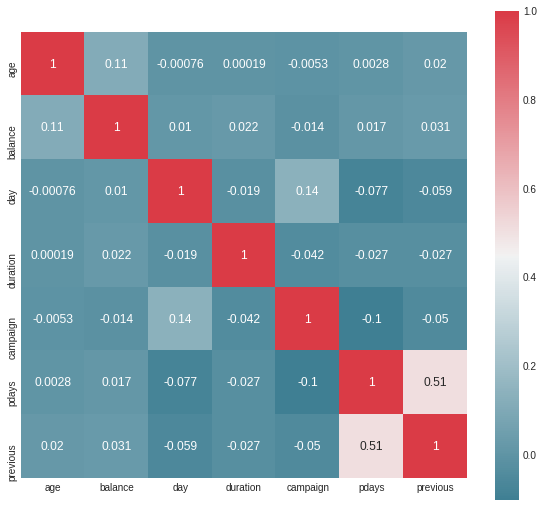

In [167]:
#Correlation map
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 10 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(df)

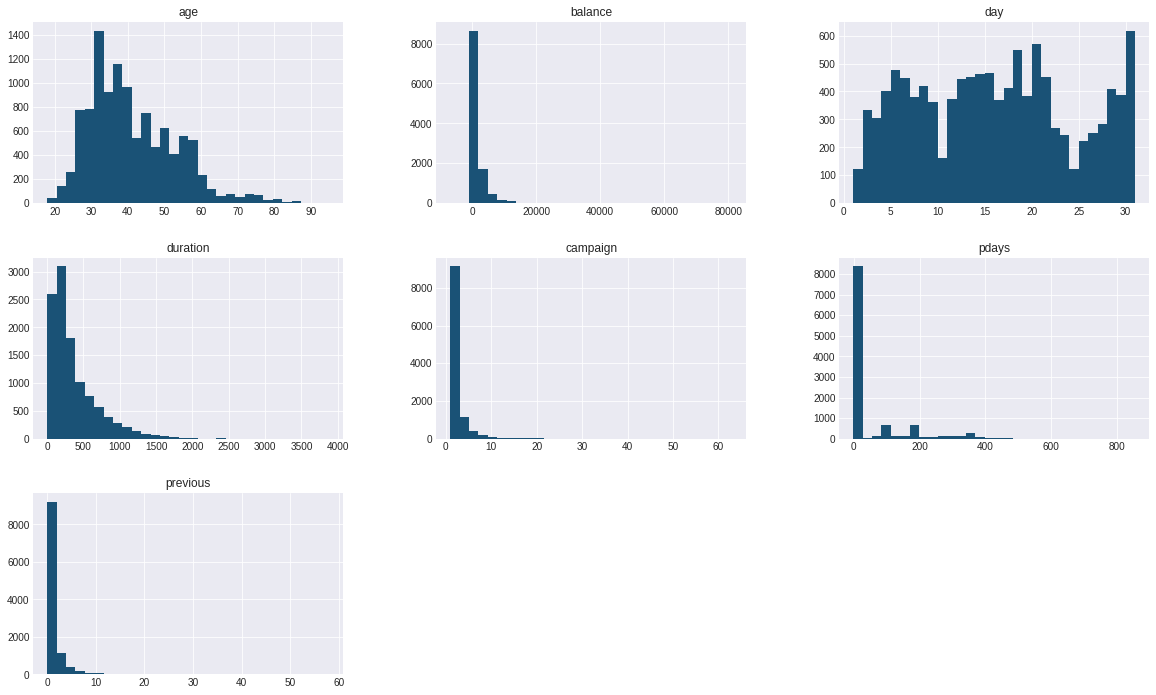

In [168]:
plt.style.use('seaborn-darkgrid')
df.hist(bins=30, figsize=(20,12), color='#1A5276')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


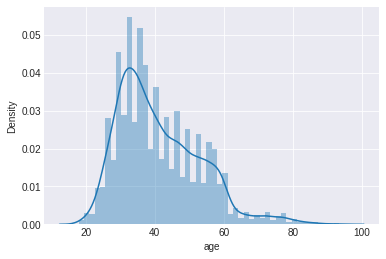

In [169]:
sns.distplot(df['age'] , kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


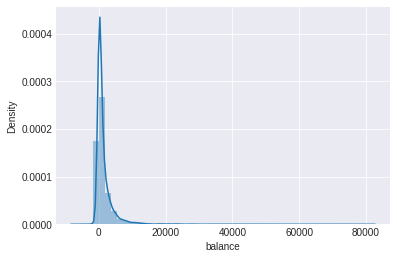

In [170]:
sns.distplot(df['balance'] , kde=True)

In [171]:
#THE CATEGORICAL FEATURES :

In [172]:
# boxplot :

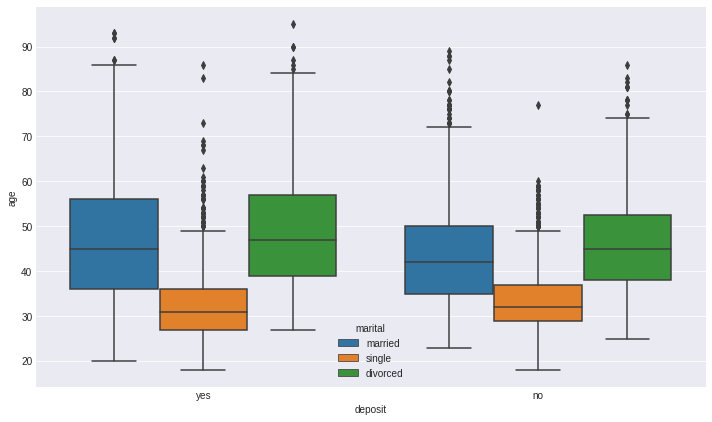

In [173]:
fig=plt.figure(figsize=(12,7))   
sns.boxplot(x="deposit", y="age", hue="marital", data=df)
plt.show()

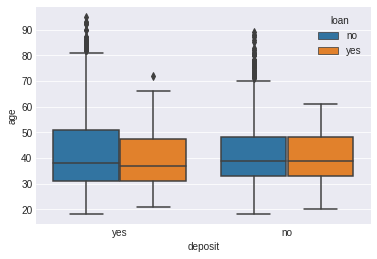

In [174]:
sns.boxplot(x="deposit", y="age", hue="loan", data=df)

plt.show()

In [175]:
# pie chart :

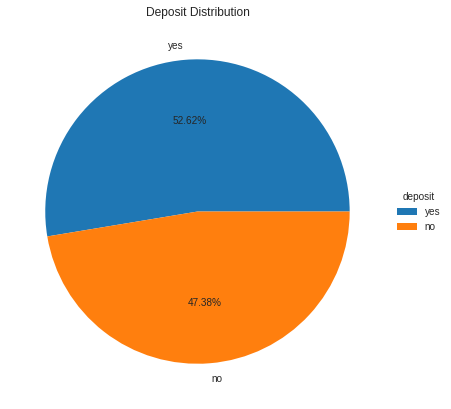

In [176]:
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

depo = ['yes', 'no']
depo_num = [5873,5289]
                                 
ax.pie(depo_num, labels = depo,autopct='%1.2f%%')
ax.legend(depo,
          title="deposit",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Deposit Distribution")

plt.show()

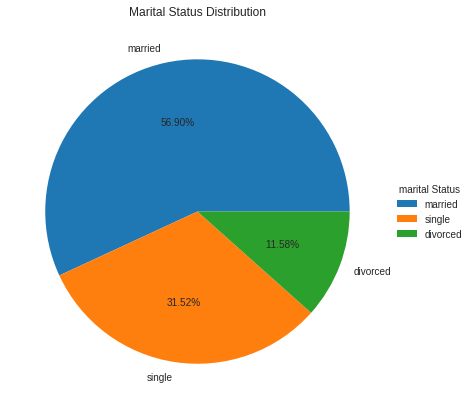

In [177]:
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

marit = ['married', 'single','divorced']
marit_num = [6351,3518,1293]
                                 
ax.pie(marit_num, labels = marit,autopct='%1.2f%%')
ax.legend(marit,
          title="marital Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

ax.set_title("Marital Status Distribution")

plt.show()

In [178]:
#splitting the date into catg/num 
cols = df.columns 
num_cols= df._get_numeric_data().columns 
cat_cols = list(set(cols) - set(num_cols))

In [179]:
# we encode the categorical data 
df_Encod = df[cat_cols].apply(LabelEncoder().fit_transform)

In [180]:
new_df = df_Encod.join(df[num_cols])
new_df.head()

,deposit,marital,month,contact,education,default,loan,housing,job,poutcome,age,balance,day,duration,campaign,pdays,previous
0,1,1,8,2,1,0,0,1,0,3,59,2343,5,1042,1,-1,0
1,1,1,8,2,1,0,0,0,0,3,56,45,5,1467,1,-1,0
2,1,1,8,2,1,0,0,1,9,3,41,1270,5,1389,1,-1,0
3,1,1,8,2,1,0,0,1,7,3,55,2476,5,579,1,-1,0
4,1,1,8,2,2,0,0,0,0,3,54,184,5,673,2,-1,0


In [181]:
# now we can see the correlation between all the features : 

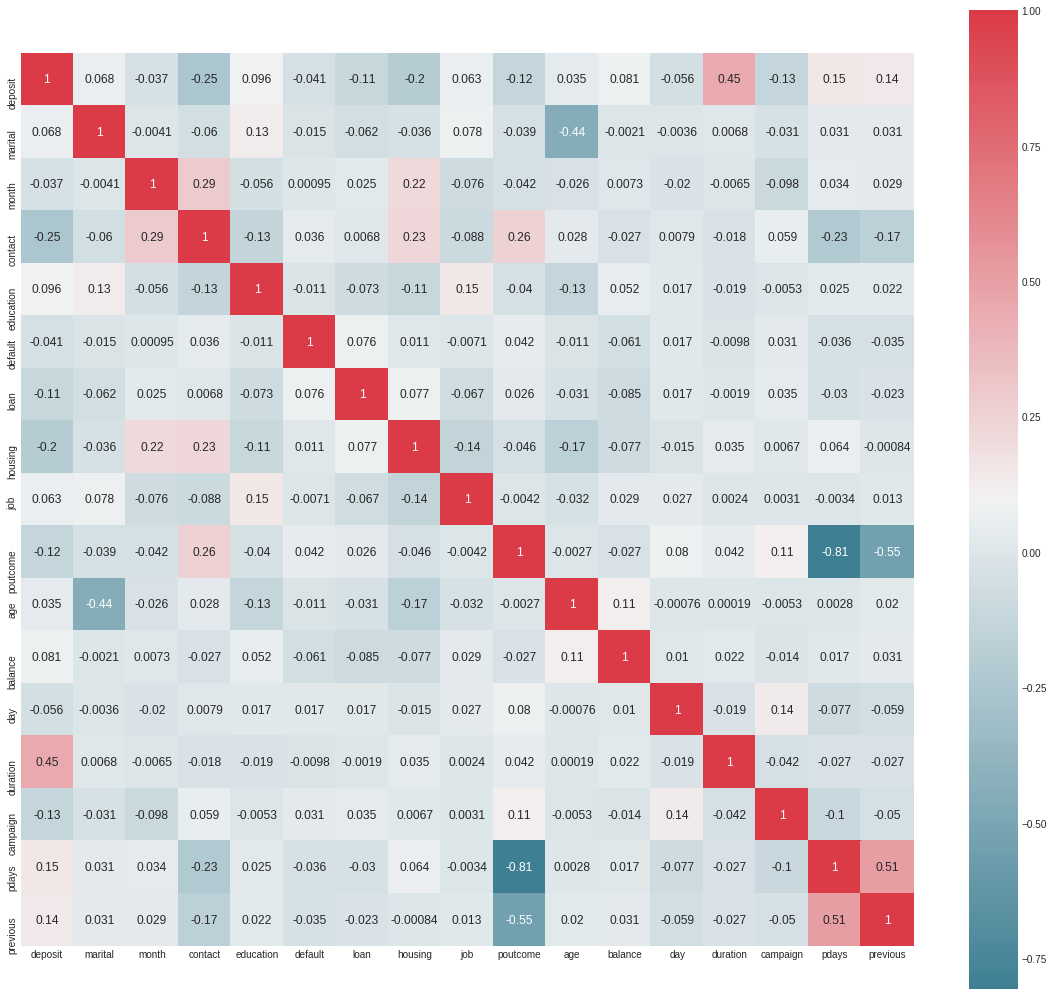

In [182]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 20 , 20 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(new_df)

In [183]:
new_df.columns

Index(['deposit', 'marital', 'month', 'contact', 'education', 'default',
       'loan', 'housing', 'job', 'poutcome', 'age', 'balance', 'day',
       'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')

In [184]:
cols= ['marital', 'month', 'contact', 'education', 'default',
       'loan', 'housing', 'job', 'poutcome', 'age', 'balance', 'day',
       'duration', 'campaign', 'pdays', 'previous']

In [185]:
X=new_df[cols]
Y=new_df['deposit']

In [186]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [187]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [188]:
model = Sequential()

In [189]:
model.add(Dense(32 , input_dim = 16 , activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

In [190]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________


In [191]:
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

In [192]:
history = model.fit(x_test , y_test , epochs=20 , validation_split=0.2)

Epoch 1/20
56/56 [==============================] - 1s 5ms/step - loss: 19.9734 - accuracy: 0.5655 - val_loss: 2.9455 - val_accuracy: 0.6734
Epoch 2/20
56/56 [==============================] - 0s 2ms/step - loss: 3.8454 - accuracy: 0.6310 - val_loss: 1.3640 - val_accuracy: 0.7427
Epoch 3/20
56/56 [==============================] - 0s 2ms/step - loss: 3.5203 - accuracy: 0.6613 - val_loss: 7.8791 - val_accuracy: 0.5951
Epoch 4/20
56/56 [==============================] - 0s 2ms/step - loss: 4.1659 - accuracy: 0.6568 - val_loss: 1.8576 - val_accuracy: 0.6734
Epoch 5/20
56/56 [==============================] - 0s 2ms/step - loss: 2.2790 - accuracy: 0.6965 - val_loss: 3.3509 - val_accuracy: 0.6756
Epoch 6/20
56/56 [==============================] - 0s 2ms/step - loss: 2.4682 - accuracy: 0.6859 - val_loss: 3.8282 - val_accuracy: 0.6264
Epoch 7/20
56/56 [==============================] - 0s 2ms/step - loss: 1.5448 - accuracy: 0.7150 - val_loss: 1.4564 - val_accuracy: 0.6868
Epoch 8/20
56/56 [=

In [193]:
model.evaluate(x_test , y_test)

70/70 [==============================] - 0s 1ms/step - loss: 1.2486 - accuracy: 0.7179


[1.248611330986023, 0.7178683280944824]

In [ ]:
#Visualization of the results (accuracy/loss) :

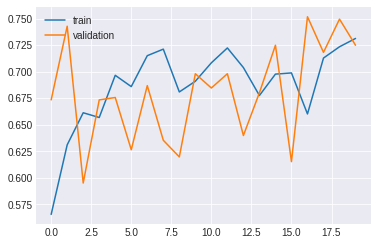

In [194]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

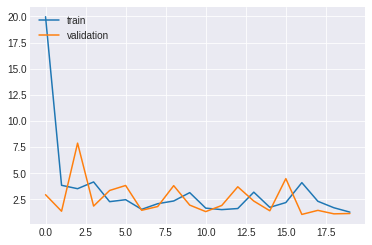

In [195]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

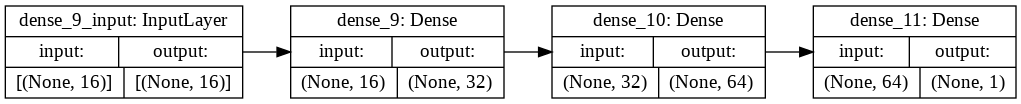

In [196]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")